# **Manipulating colorspaces**

Images to use: 
  - [ball_image](https://drive.google.com/file/d/1wcqa7NHc9KALs6F86_vRczjcitmK7tGA/view?usp=sharing)

# **Segmentation in RGB**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


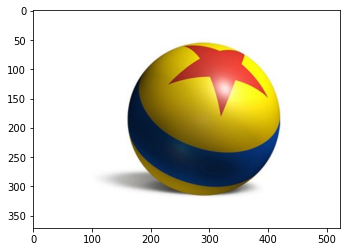

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Take an image
image = cv.imread('/content/drive/MyDrive/PatronesClass2022/Repositorio/patrones/Clase3/ball.png',1)
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)

plt.imshow (image)

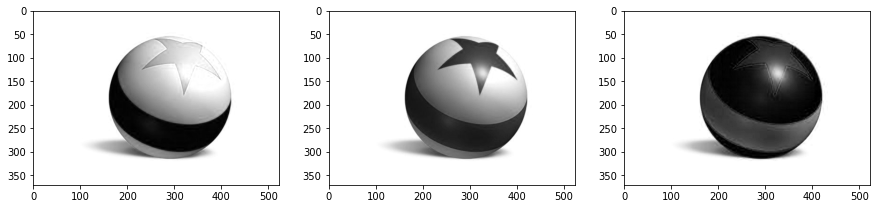

In [4]:
fig, axes = plt.subplots (1,3, figsize = (15,5))
axes[0].imshow(image[:,:,0], cmap = 'gray');# axes[0].set_xticks([]); axes[0].set_yticks([])
axes[1].imshow(image[:,:,1], cmap = 'gray');# axes[1].set_xticks([]); axes[1].set_yticks([])
axes[2].imshow(image[:,:,2], cmap = 'gray');# axes[2].set_xticks([]); axes[2].set_yticks([])
# plt.show()

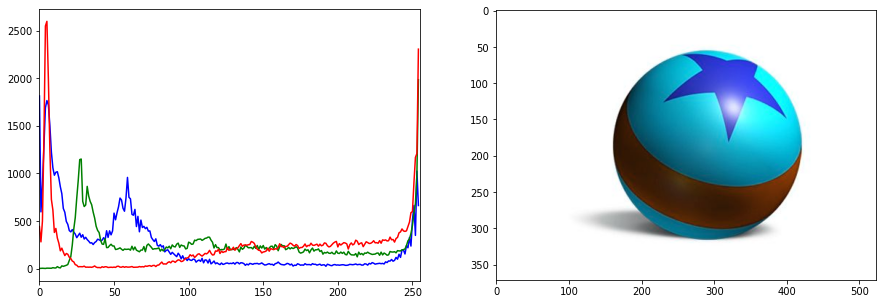

In [5]:
image = cv.imread('/content/drive/MyDrive/PatronesClass2022/Repositorio/patrones/Clase3/ball.png',1)

#color = ('b','g','r')
color = ('b','g','r')

fig, axes = plt.subplots (1,2, figsize = (15,5))
for i,col in enumerate(color):
  #inputs : imagen, iterador con el canal de color, valor maximo de color segun tipo de bits de imagen, desde donde inicia hasta donde termina 0,255
    histr = cv.calcHist([image],[i],None,[ 255 ],[ 0 , 255 ])
    axes[0].plot(histr,color = col)
    #set_xlim le pone limites al eje x
    axes[0].set_xlim([0, 255])

axes[1].imshow(image)
plt.show()

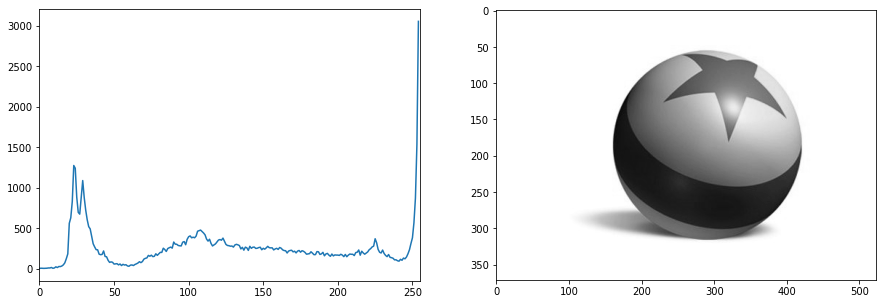

In [6]:
image_gray =cv.imread('/content/drive/MyDrive/PatronesClass2022/Repositorio/patrones/Clase3/ball.png',0)

fig, axes = plt.subplots (1,2, figsize = (15,5))
histr = cv.calcHist([image_gray],[ 0 ],None,[ 255 ],[ 0 , 255 ])
axes[0].plot(histr)
axes[0].set_xlim([0,255])

axes[1].imshow( image_gray, cmap = 'gray' )
#plt.show()

## Segment one zone - The star

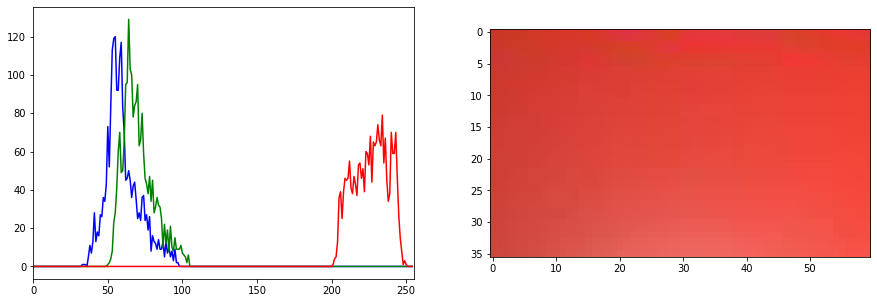

In [7]:
image = cv.imread('/content/drive/MyDrive/PatronesClass2022/Repositorio/patrones/Clase3/ball.png',1)
#image = cv.cvtColor(image,cv.COLOR_BGR2RGB)

roi = image[74:110,290:350,:] 

color = ('b','g','r')

fig, axes = plt.subplots (1,2, figsize = (15,5))
for i,col in enumerate(color):
    histr = cv.calcHist([roi],[i],None,[ 255 ],[ 0 , 255 ])
    axes[0].plot(histr,color = col)
    axes[0].set_xlim([0,255])

axes[1].imshow( cv.cvtColor(roi,cv.COLOR_BGR2RGB ))
plt.show()

In [8]:
lower_red = np.uint8([[[ 40 , 50 , 200 ]]])
upper_red = np.uint8([[[ 100 , 110 , 255 ]]])

In [9]:
mask = np.zeros ([image.shape[0], image.shape[1]], dtype = "uint8")

for i in range(image.shape[0]) :
  for j in range(image.shape[1]):
    if lower_red[0,0,0] < image[i,j,0] < upper_red[0,0,0] and \
       lower_red[0,0,1] < image[i,j,1] < upper_red[0,0,1] and \
       lower_red[0,0,2] < image[i,j,2] < upper_red[0,0,2] :
      mask[i,j] = 255
    else: 
      mask[i,j] = 0



In [10]:
# Bitwise-AND mask and original image
#enmascara elimina lo que esta en negro y deja lo blanco
res = cv.bitwise_and(image, image, mask = mask)

In [11]:
def segment_color (image, lower_color, upper_color): 
  #
  mask = np.zeros ([image.shape[0], image.shape[1]], dtype = "uint8")
  
  for i in range(image.shape[0]) :
    for j in range(image.shape[1]):
      if lower_color[0,0,0] < image[i,j,0] < upper_color[0,0,0] and \
         lower_color[0,0,1] < image[i,j,1] < upper_color[0,0,1] and \
         lower_color[0,0,2] < image[i,j,2] < upper_color[0,0,2] :
        mask[i,j] = np.int(255)
      else: 
        mask[i,j] = np.int(0)
  return mask

In [12]:
mask = segment_color (image, lower_red, upper_red)

# Bitwise-AND mask and original image
res = cv.bitwise_and(image, image, mask = mask)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addition

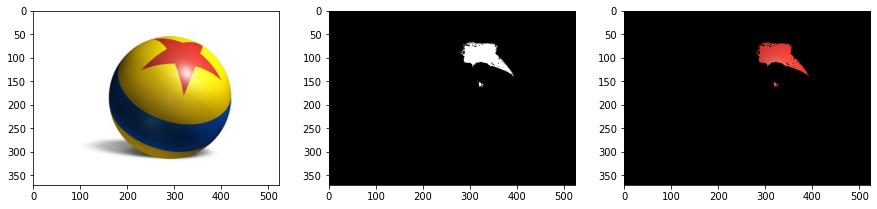

In [13]:
fig, axes = plt.subplots (1,3, figsize = (15,5))
axes[0].imshow( cv.cvtColor(image, cv.COLOR_BGR2RGB) )#; axes[0].set_xticks([]); axes[0].set_yticks([]) # Show image
axes[1].imshow( mask, cmap = 'gray' )#; axes[1].set_xticks([]); axes[1].set_yticks([]) # Show mask
axes[2].imshow( cv.cvtColor(res,cv.COLOR_BGR2RGB) )#; axes[2].set_xticks([]); axes[2].set_yticks([]) # Show Result

## Segment another zone - Blue ribbon

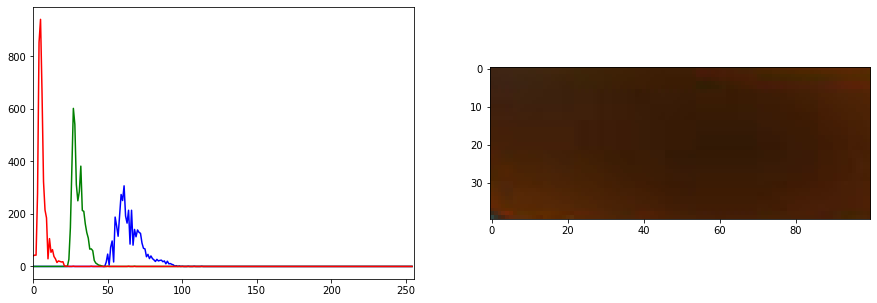

In [14]:
roi = image [250:290, 250:350]

color = ('b','g','r')
fig, axes = plt.subplots (1,2, figsize = (15,5))
for i,col in enumerate(color):
    histr = cv.calcHist([roi],[i],None,[ 255 ],[ 0 , 255 ])
    axes[0].plot(histr,color = col)
    axes[0].set_xlim([0,255])

axes[1].imshow( roi )
plt.show()

In [15]:
# define range of blue color in BGR
lower_blue = np.uint8([[[ 50 , 40 , 0 ]]])
upper_blue = np.uint8([[[ 255 , 50 , 40 ]]])

In [16]:
mask = segment_color (image, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv.bitwise_and(image, image, mask = mask)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addition

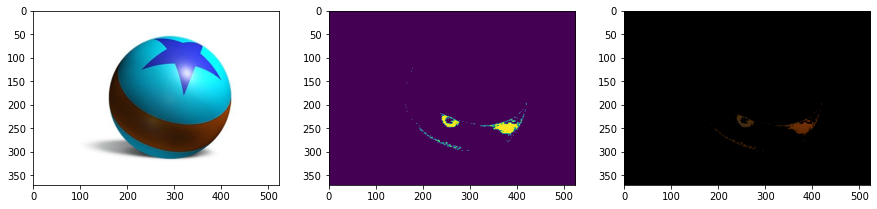

In [17]:
fig, axes = plt.subplots (1,3, figsize = (15,5))
axes[0].imshow( image )#; axes[0].set_xticks([]); axes[0].set_yticks([]) # Show image
axes[1].imshow( mask )#; axes[1].set_xticks([]); axes[1].set_yticks([]) # Show mask
axes[2].imshow( res )#; axes[2].set_xticks([]); axes[2].set_yticks([]) # Show Result

# **Segmentation in HSV - More robustness**

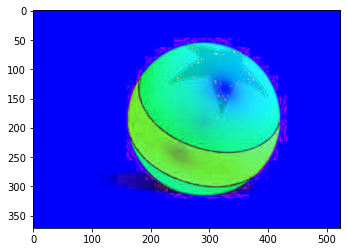

In [18]:
# Take an image
image = cv.imread('/content/drive/MyDrive/PatronesClass2022/Repositorio/patrones/Clase3/ball.png',1)

# Convert BGR to HSV
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
plt.imshow (hsv_image)

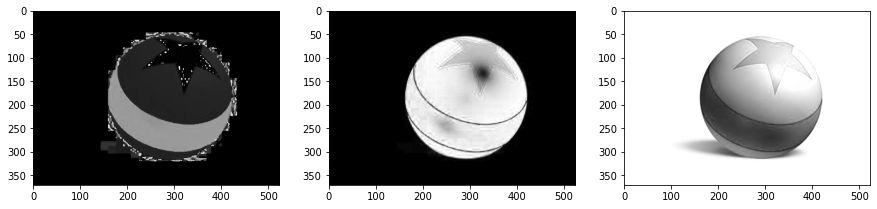

In [19]:
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

fig, axes = plt.subplots (1,3, figsize = (15,5))
axes[0].imshow(hsv_image[:,:,0], cmap = 'gray')# axes[0].set_xticks([]); axes[0].set_yticks([])
axes[1].imshow(hsv_image[:,:,1], cmap = 'gray')# axes[1].set_xticks([]); axes[1].set_yticks([])
axes[2].imshow(hsv_image[:,:,2], cmap = 'gray')# axes[2].set_xticks([]); axes[2].set_yticks([])

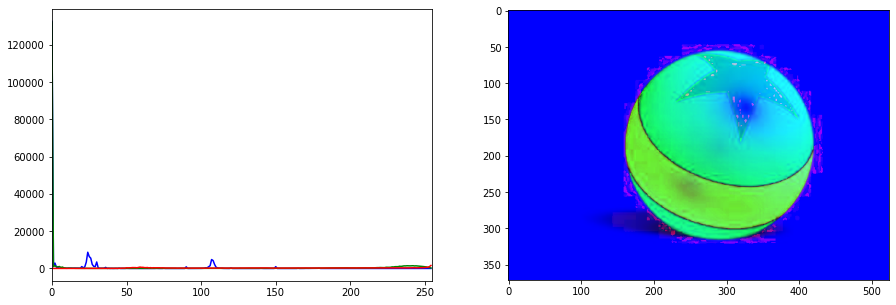

In [20]:
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

color = ('b','g','r')

fig, axes = plt.subplots (1,2, figsize = (15,5))
for i,col in enumerate(color):
    histr = cv.calcHist([hsv_image],[i],None,[ 255 ],[ 0 , 255 ])
    axes[0].plot(histr,color = col)
    axes[0].set_xlim([0,255])

axes[1].imshow(hsv_image)

## Segment first zone in HSV

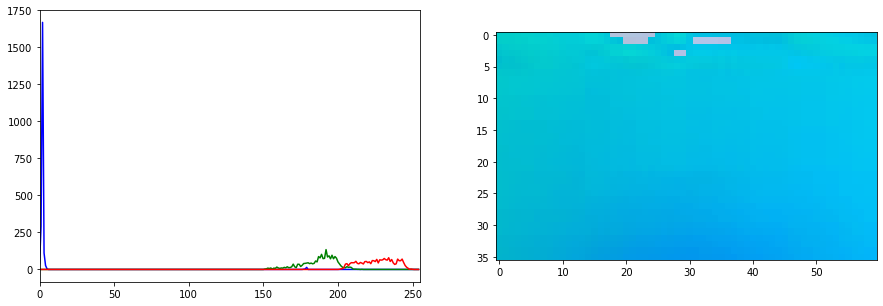

In [21]:
roi = hsv_image[74:110,290:350,:]  

color = ('b','g','r')

fig, axes = plt.subplots (1,2, figsize = (15,5))
for i,col in enumerate(color):
    histr = cv.calcHist([roi],[i],None,[ 255 ],[ 0 , 255 ])
    axes[0].plot(histr,color = col)
    axes[0].set_xlim([0,255])

axes[1].imshow( roi )

In [22]:
# define range of blue color in BGR
lower_red_hsv = np.uint8([[[ 30 , 50 , 200]]])
upper_red_hsv = np.uint8([[[ 100 , 110 , 255 ]]])

In [23]:
mask = segment_color ( image , lower_red_hsv , upper_red_hsv )

# Bitwise-AND mask and original image
res = cv.bitwise_and(image, image, mask = mask)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addition

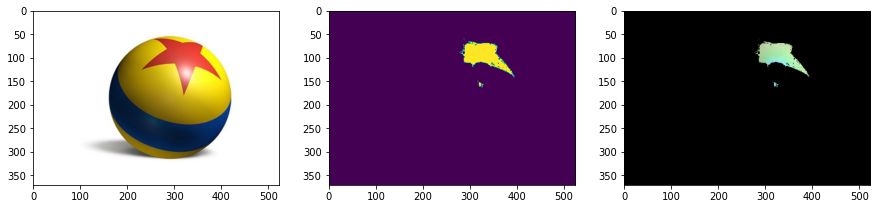

In [24]:
fig, axes = plt.subplots (1,3, figsize = (15,5))
axes[0].imshow( cv.cvtColor(image, cv.COLOR_BGR2RGB) )#; axes[0].set_xticks([]); axes[0].set_yticks([]) # Show image in RGB
axes[1].imshow( mask )#; axes[1].set_xticks([]); axes[1].set_yticks([]) # Show mask
axes[2].imshow( cv.cvtColor(res, cv.COLOR_HSV2RGB) )#; axes[2].set_xticks([]); axes[2].set_yticks([]) # Show Result in RGB

## Segment second zone in HSV

In [ ]:
roi = 

color = ('b','g','r')

fig, axes = plt.subplots (1,2, figsize = (15,5))
for i,col in enumerate(color):
    histr = cv2.calcHist([roi],[i],None,[ _ ],[ _ , _ ])
    axes[0].plot(histr,color = col)
    axes[0].set_xlim([0,255])

axes[1].imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

In [ ]:
# define range of blue color in BGR
lower_blue_hsv = np.uint8([[[ _ , _ , _ ]]])
upper_blue_hsv = np.uint8([[[ _ , _ , _ ]]])

In [ ]:
mask = segment_color ( _ , _ , _ )

# Bitwise-AND mask and original image
res = cv2.bitwise_and(image, image, mask = mask)

In [ ]:
fig, axes = plt.subplots (1,3, figsize = (15,5))
axes[0].imshow( _ ); axes[0].set_xticks([]); axes[0].set_yticks([]) # Show image in RGB
axes[1].imshow( _ ); axes[1].set_xticks([]); axes[1].set_yticks([]) # Show mask
axes[2].imshow( _ ); axes[2].set_xticks([]); axes[2].set_yticks([]) # Show Result in RGB